# 1. Project Introduction


a). This project aim to gain an insight from dataset that, includes demographic and behavioral information about customers, which can help in identifying distinct segments within the customer base. This can be particularly useful for targeted marketing strategies, improving customer satisfaction, and increasing sales.

#### b). Data Dictionary:

id: Unique identifier for each customer.
age: Age of the customer.
gender: Gender of the customer (Male, Female, Other).
income: Annual income of the customer (in USD).
spending_score: Spending score (1-100), indicating the customer's spending behavior and loyalty.
membership_years: Number of years the customer has been a member.
purchase_frequency: Number of purchases made by the customer in the last year.
preferred_category: Preferred shopping category (Electronics, Clothing, Groceries, Home & Garden, Sports).
last_purchase_amount: Amount spent by the customer on their last purchase (in USD).
#### c). Potential Uses:

Customer Segmentation: Identify different customer segments based on their demographic and behavioral characteristics.
Targeted Marketing: Develop targeted marketing strategies for different customer segments.
Customer Loyalty Programs: Design loyalty programs based on customer spending behavior and preferences.
Sales Analysis: Analyze sales patterns and predict future trends.
d). For this project we will do the customer Recency, Frequency, and Monetary - RFM.

#### e). RFM (Recency, Frequency, and Monetary) analysis 
is a marketing technique used to segment customers based on their purchasing behavior. It considers three factors:

Recency (R): How recently a customer made a purchase.
Frequency (F): How often a customer makes a purchase.
Monetary (M): How much money a customer spends on purchase.
#### f). Given the dataset provided, we can perform an RFM analysis as follows:

Recency: We don't have exact dates, but we can assume that 'membershp_years' cloud be a proxy. However, this is not ideal. If you don't have purchase dates, it would be more accurate.
Frequency: This can be directly mapped from the 'purchase_frequency' column.
Monetary: This can be taken from the 'last_purcahse_amount'.
#### g). We will use:

membership_years inversely as a proxy for recency (more recent = fewer membership years).
purchase_frequency as frequency.
last_purchase_amount as monetary value.

# 2. Importing Libraries

In [ ]:
pip install ydata-profiling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from ydata_profiling import ProfileReport
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# 3. Read dataset

In [77]:
file_path = 'customer_segmentation_data.csv'
df = pd.read_csv(file_path)

# 4. Exploratory Data Analysis - EDA

In [114]:
df.head()

id  age  gender  income  spending_score  membership_years  \
0   1   38  Female   99342              90                 3   
1   2   21  Female   78852              60                 2   
2   3   60  Female  126573              30                 2   
3   4   40   Other   47099              74                 9   
4   5   65  Female  140621              21                 3   

   purchase_frequency preferred_category  last_purchase_amount  
0                  24          Groceries                113.53  
1                  42             Sports                 41.93  
2                  28           Clothing                424.36  
3                   5      Home & Garden                991.93  
4                  25        Electronics                347.08

In [116]:
df.tail()

id  age  gender  income  spending_score  membership_years  \
995   996   57    Male  112170              57                 6   
996   997   23   Other   65337              76                10   
997   998   23    Male  113097              40                 5   
998   999   22  Female  113695              63                 7   
999  1000   36  Female   90420               7                 2   

     purchase_frequency preferred_category  last_purchase_amount  
995                   1           Clothing                313.64  
996                  23          Groceries                632.83  
997                  42             Sports                 75.09  
998                  44        Electronics                505.16  
999                  31          Groceries                669.26

In [118]:
profile = ProfileReport(df, title="Customer Segmentation Data Profile", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [119]:
df.isnull().sum()

id                      0
age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64

In [122]:
df.isna().sum()

id                      0
age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64

In [124]:
df.describe()

id          age         income  spending_score  \
count  1000.000000  1000.000000    1000.000000     1000.000000   
mean    500.500000    43.783000   88500.800000       50.685000   
std     288.819436    15.042213   34230.771122       28.955175   
min       1.000000    18.000000   30004.000000        1.000000   
25%     250.750000    30.000000   57911.750000       26.000000   
50%     500.500000    45.000000   87845.500000       50.000000   
75%     750.250000    57.000000  116110.250000       76.000000   
max    1000.000000    69.000000  149973.000000      100.000000   

       membership_years  purchase_frequency  last_purchase_amount  
count        1000.00000         1000.000000           1000.000000  
mean            5.46900           26.596000            492.348670  
std             2.85573           14.243654            295.744253  
min             1.00000            1.000000             10.400000  
25%             3.00000           15.000000            218.762500  
50%             5.00000           27.000000            491.595000  
75%             8.00000           39.000000            747.170000  
max            10.00000           50.000000            999.740000

### Interpretation of Descriptive Statistics

#### 1. Age

+  Count: 1000.0 - There are 1000 observations for age.
+ Mean: 43.78 - The average age of the customers is approximately 43.78 years.
+ Std (Standard Deviation): 15.04 - Ages vary around the mean by about 15.04 years.
+ Min: 18.0 - The youngest customer is 18 years old.
+ 25%: 30.0 - 25% of the customers are below 30 years old.
+ 50% (Median): 45.0 - The median age is 45 years.
+ 75%: 57.0 - 75% of the customers are below 57 years old.
+ Max: 69.0 - The oldest customer is 69 years old.

#### 2. Income

+ Count: 1000.0 - There are 1000 observations for income.
+ Mean: 88,500.80 - The average income of the customers is approximately $88,500.80.
+ Std (Standard Deviation): 34,230.78 - Incomes vary around the mean by about $34,230.78.
+ Min: 30,004.0 - The lowest income is $30,004.
+ 25%: 57,911.75 - 25% of the customers have incomes below $57,911.75.
+ 50% (Median): 87,845.50 - The median income is $87,845.50.
+ 75%: 116,110.25 - 75% of the customers have incomes below $116,110.25.
+ Max: 149,973.0 - The highest income is $149,973.

#### 3. Spending_score

+ Count: 1000.0 - There are 1000 observations for spending scores.
+ Mean: 50.69 - The average spending score is approximately 50.69.
+ Std (Standard Deviation): 28.96 - Spending scores vary around the mean by about 28.96 units.
+ Min: 1.0 - The lowest spending score is 1.
+ 25%: 26.0 - 25% of the customers have spending scores below 26.
+ 50% (Median): 50.0 - The median spending score is 50.
+ 75%: 76.0 - 75% of the customers have spending scores below 76.
+ Max: 100.0 - The highest spending score is 100.

#### 4. Membership_years

+ Count: 1000.0 - There are 1000 observations for membership years.
+ Mean: 5.47 - The average number of membership years is approximately 5.47.
+ Std (Standard Deviation): 2.86 - Membership years vary around the mean by about 2.86 years.
+ Min: 1.0 - The shortest membership duration is 1 year.
+ 25%: 3.0 - 25% of the customers have been members for 3 years or less.
+ 50% (Median): 5.0 - The median membership duration is 5 years.
+ 75%: 8.0 - 75% of the customers have been members for 8 years or less.
+ Max: 10.0 - The longest membership duration is 10 years.

#### 5. Purchase_frequency

+ Count: 1000.0 - There are 1000 observations for purchase frequency.
+ Mean: 26.60 - The average purchase frequency is approximately 26.60 times.
+ Std (Standard Deviation): 14.24 - Purchase frequencies vary around the mean by about 14.24 times.
+ Min: 1.0 - The lowest purchase frequency is 1 time.
+  25%: 15.0 - 25% of the customers have purchase frequencies of 15 times or less.
+ 50% (Median): 27.0 - The median purchase frequency is 27 times.
+ 75%: 39.0 - 75% of the customers have purchase frequencies of 39 times or less.
+ Max: 50.0 - The highest purchase frequency is 50 times.

#### 6. Last_purchase_amount

+  Count: 1000.0 - There are 1000 observations for the last purchase amount.
+ Mean: 492.35 - The average last purchase amount is approximately 492.35.
+ Std (Standard Deviation): 295.74 - Last purchase amounts vary around the mean by about 295.74.
+ Min: 10.4 - The smallest last purchase amount is 10.4.
+  25%: 218.76 - 25% of the customers have last purchase amounts below 218.76.
+  50% (Median): 491.60 - The median last purchase amount is 491.60.
+ 75%: 747.17 - 75% of the customers have last purchase amounts below 747.17.
+ Max: 999.74 - The highest last purchase amount is 999.74.

#### Summary

- Customer Demographics: The average customer is around 44 years old, with the majority aged between 30 and 57.
- Income Levels: The average income is about 88,500, with a considerable range from 30,004 to 149,973.
- Spending Scores: These vary widely, with an average score around the mid-point of the scale.
- Membership Duration: Customers have been members for about 5.5 years on average, with durations ranging from 1 to 10 years.
- Purchase Behavior: The average customer makes purchases around 26 times, with a significant range in frequency.
- Purchase Amounts: Last purchase amounts average around 492, with a wide range from 10 to nearly 1,000.
This summary provides a comprehensive overview of the customer base, helping in understanding the general trends and distributions across different variables.

### Distribution of Age, Income, Purchase Frequency and Spending Score based on quantity:

In [ ]:
!conda install nodejs
!conda install jupyterlab-plotly

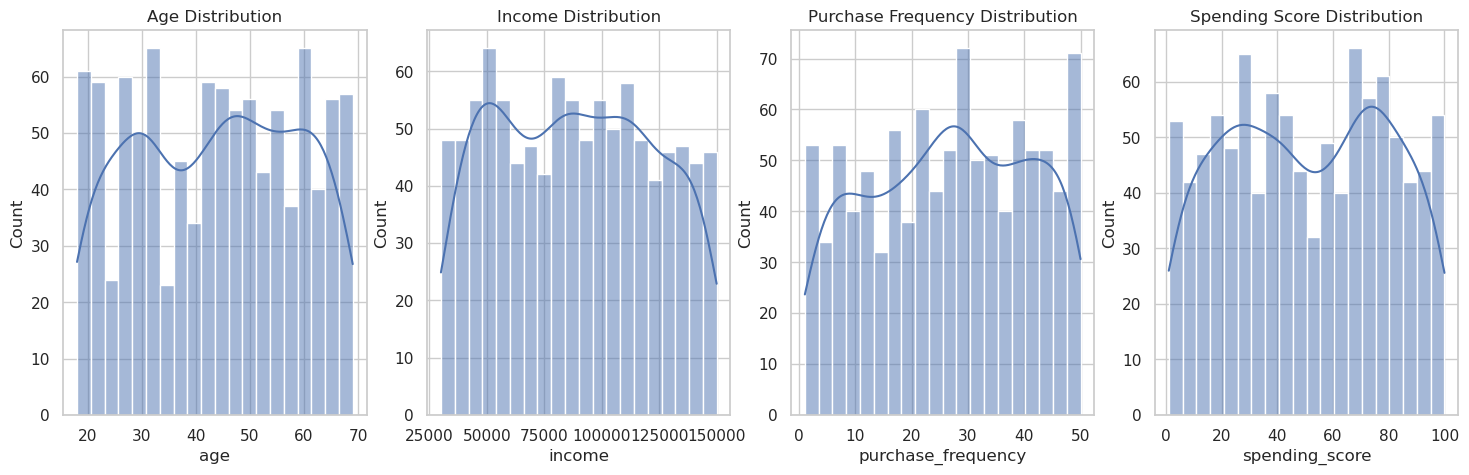

In [127]:
# Set plot style
sns.set(style="whitegrid")

# 1. Distribution of Age, Income, Purchase Frequency and Spending Score
fig, axes = plt.subplots (1, 4, figsize=(18, 5))

sns.histplot(df['age'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')

sns.histplot(df['income'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Income Distribution')

sns.histplot(df['purchase_frequency'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Purchase Frequency Distribution')

sns.histplot(df['spending_score'], bins=20, kde=True, ax=axes[3])
axes[3].set_title('Spending Score Distribution')

fig.show()

The age distribution is relatively uniform. Income has a wide range, with a noticeable concentration around certain income levels. Purchase frequency shows variability, with some customers making frequent purchases and others less frequently. Spending score varies widely, indicating diverse spending behaviors.

### Distribution of Age, Income, Purchase Frequency and Spending Score by Gender:

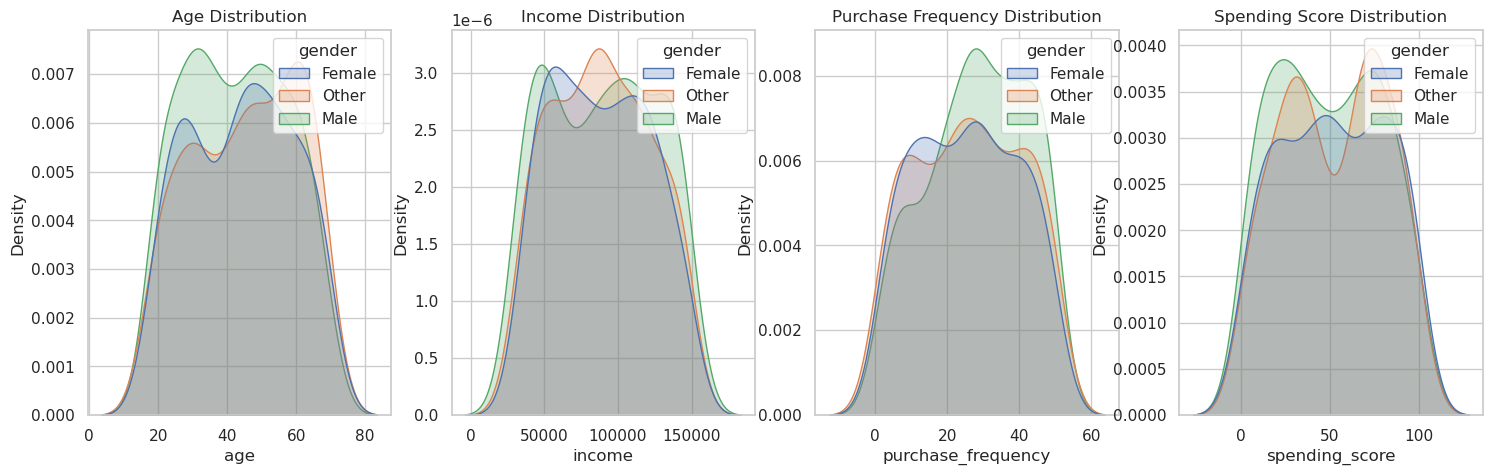

In [129]:
fig, axes = plt.subplots (1, 4, figsize=(18, 5))

sns.kdeplot(data=df, x='age', hue='gender', shade=True,ax=axes[0])
axes[0].set_title('Age Distribution') 

sns.kdeplot(data=df, x='income', hue='gender', shade=True,ax=axes[1])
axes[1].set_title('Income Distribution')

sns.kdeplot(data=df, x='purchase_frequency', hue='gender', shade=True,ax=axes[2])
axes[2].set_title('Purchase Frequency Distribution')

sns.kdeplot(data=df, x='spending_score', hue='gender', shade=True,ax=axes[3])
axes[3].set_title('Spending Score Distribution')

plt.show()

Male has wide age distribution. The gender distribution of income is concentrated in certain income levels. Purchase frequency is distributed differently between the sexes, with men having the highest distribution. Male spending points are widely distributed, reflecting the diversity of shopping behaviour.

### Relationship between Income and Spending Score:

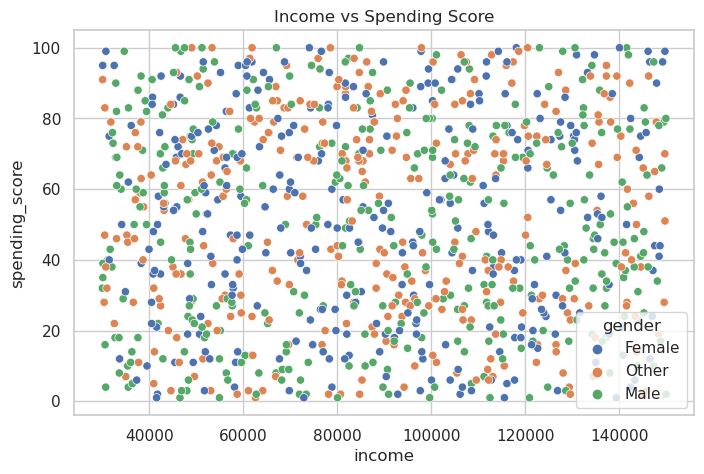

In [131]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='income', y='spending_score', hue='gender')
plt.title('Income vs Spending Score')
plt.show()

There is no clear linear relationship between income and spending score, indicating that higher income does not necessarily lead to higher spending score

In [134]:
df['gender'].value_counts(normalize = True)

gender
Male      0.357
Other     0.327
Female    0.316
Name: proportion, dtype: float64

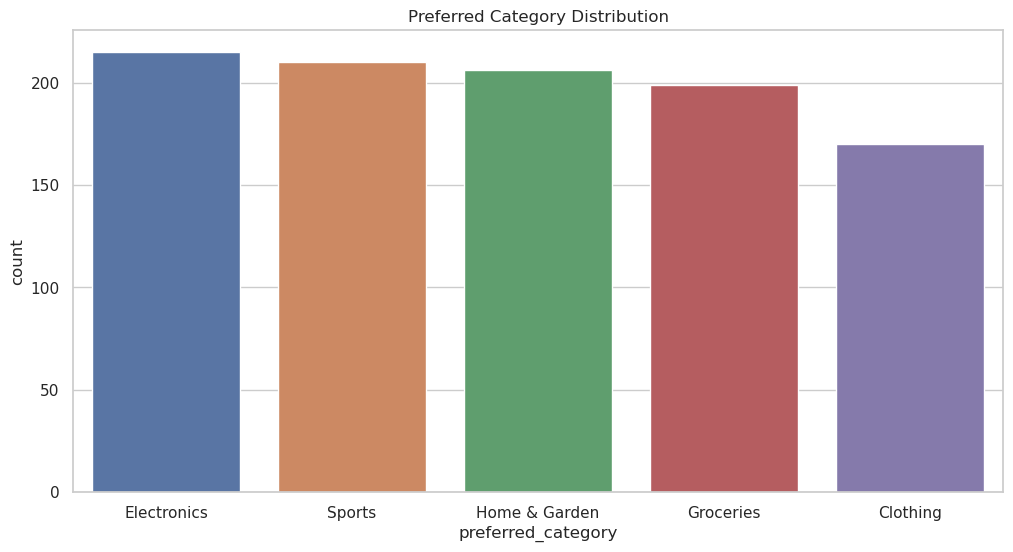

In [136]:
plt.figure(figsize=(12, 6))
sns.countplot(x='preferred_category', data=df, order=df['preferred_category'].value_counts().index)
plt.title('Preferred Category Distribution')
plt.show()

Electronics, Sports, and Homes & Garden are among the top preferred categories.

#### Preferred Category Distribution by Gender

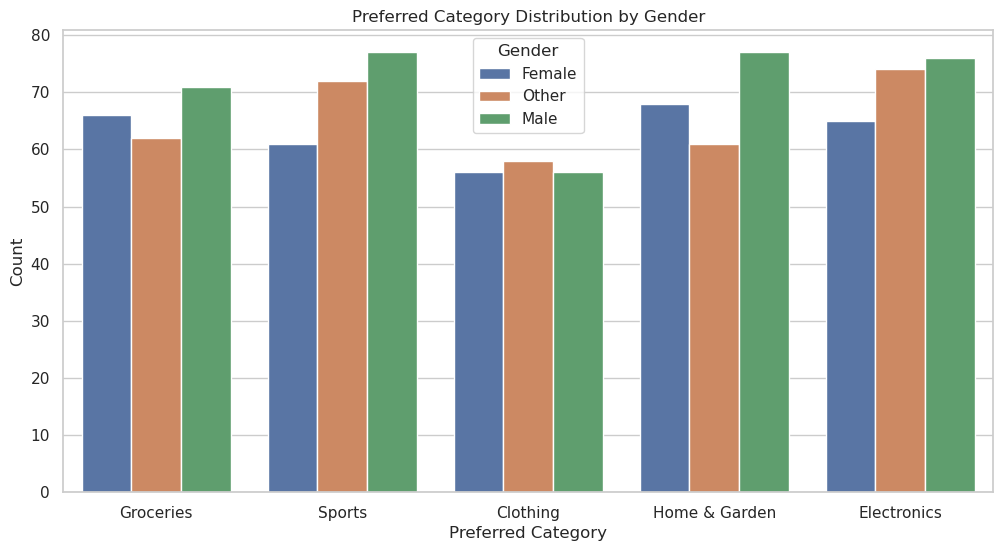

In [140]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='preferred_category', hue='gender')
plt.title('Preferred Category Distribution by Gender')
plt.xlabel('Preferred Category')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

Home & Garden is among the top preferred categories by Female and Male. In addtion, female generally spend on groceries and men spend on sports-related items.

In [143]:
# Group by 'Gender' and aggregate
result = df.groupby('gender').agg({
    'age': ['mean', 'median', 'max', 'min'],
    'income': ['mean', 'median', 'max', 'min'],
    'spending_score': ['mean', 'median', 'max', 'min']
})

print(result)

              age                       income                          \
             mean median max min          mean   median     max    min   
gender                                                                   
Female  43.876582   45.0  69  18  88018.104430  86801.5  149744  30074   
Male    42.434174   43.0  69  18  88907.997199  89688.0  149973  30004   
Other   45.165138   47.0  69  18  88522.703364  87418.0  149741  30058   

       spending_score                  
                 mean median  max min  
gender                                 
Female      51.696203   51.0  100   1  
Male        48.778711   47.0  100   1  
Other       51.788991   54.0  100   1  


In [145]:
df.pivot_table(index = 'gender',values = ['age', 'income','spending_score'], aggfunc =[np.mean,np.median])

mean                              median                        
              age        income spending_score    age   income spending_score
gender                                                                       
Female  43.876582  88018.104430      51.696203   45.0  86801.5           51.0
Male    42.434174  88907.997199      48.778711   43.0  89688.0           47.0
Other   45.165138  88522.703364      51.788991   47.0  87418.0           54.0

### Correlation heatmap

#### Convert gender and purchase_frequency to int

In [9]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1, 'Other': 2})
df['preferred_category'] = df['preferred_category'].astype('category').cat.codes

df.head()

id  age  gender  income  spending_score  membership_years  \
0   1   38       1   99342              90                 3   
1   2   21       1   78852              60                 2   
2   3   60       1  126573              30                 2   
3   4   40       2   47099              74                 9   
4   5   65       1  140621              21                 3   

   purchase_frequency  preferred_category  last_purchase_amount  
0                  24                   2                113.53  
1                  42                   4                 41.93  
2                  28                   0                424.36  
3                   5                   3                991.93  
4                  25                   1                347.08

In [ ]:
!pip install seaborn --upgrade

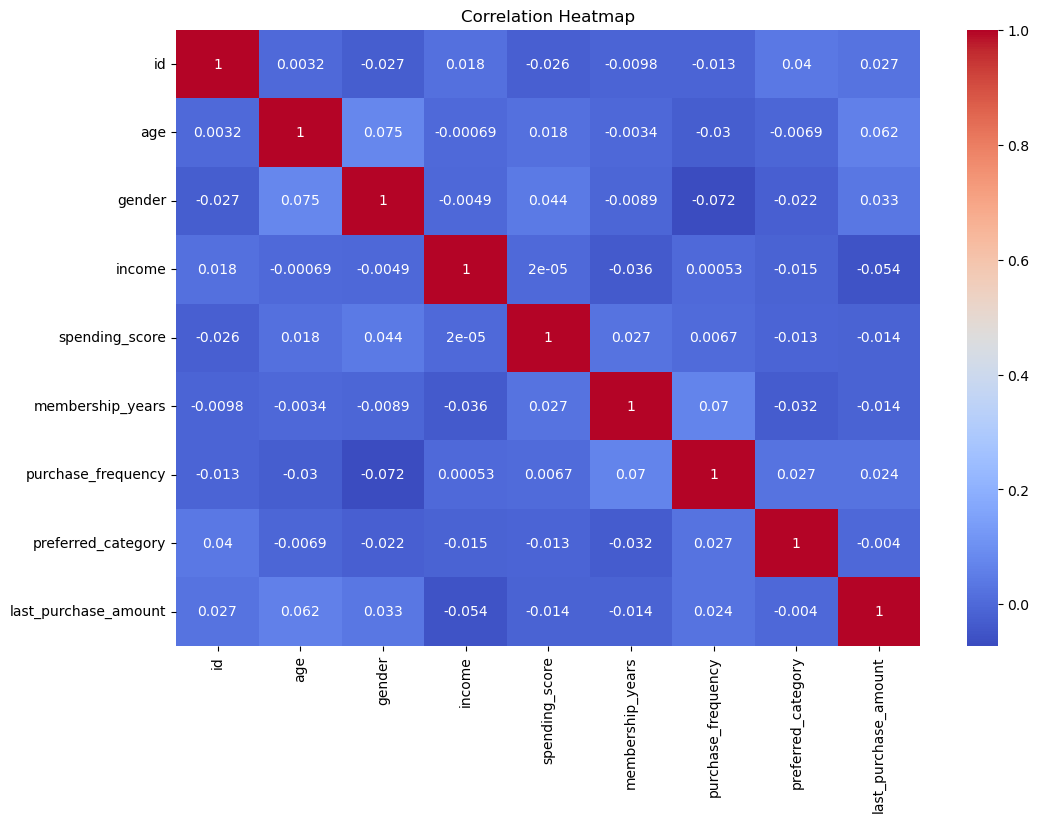

In [11]:
plt.figure(figsize=(12, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# 5. RFM Calculation

- #### Recency: How recently a customer has made a purchase.
    Indicates engagement and potential interest. Customers who have purchased recently are more likely to respond to marketing efforts and promotions.
- #### Frequency: How often a customer makes a purchase.
    Measures loyalty and ongoing engagement. Frequent buyers have greater attachment to the business and can be targeted with loyalty programs or special offers.
- #### Monetary Value: How much a customer spends.
    Reflects customer value and profitability. High spenders are valuable for driving revenue and can be rewarded with exclusive perks.

In [19]:
# Define the current year for recency calculation
current_year = 2024

# Calculate Recency
df['Recency'] = current_year - df['membership_years']

# Use purchase_frequency directly for Frequency
df['Frequency'] = df['purchase_frequency']

# Calculate Monetary value
df['Monetary'] = df['last_purchase_amount'] * df['purchase_frequency']

# Select relevant columns for RFM analysis
rfm_data = df[['id', 'Recency', 'Frequency', 'Monetary']]

rfm_data.head()

id  Recency  Frequency  Monetary
0   1     2021         24   2724.72
1   2     2022         42   1761.06
2   3     2022         28  11882.08
3   4     2015          5   4959.65
4   5     2021         25   8677.00

# 6. RFM Scoring

#### R-F-M was divided into the 20th, 40th, 60th, and 80th percentiles (quantiles)

In [75]:
# Define quantiles for scoring
quantiles = rfm_data[['Recency', 'Frequency', 'Monetary']].quantile(q=[0.2, 0.4, 0.6, 0.8]).to_dict()

# Function to assign scores based on quantiles
def r_score(x):
    if x <= quantiles['Recency'][0.2]:
        return 5
    elif x <= quantiles['Recency'][0.4]:
        return 4
    elif x <= quantiles['Recency'][0.6]:
        return 3
    elif x <= quantiles['Recency'][0.8]:
        return 2
    else:
        return 1

def fm_score(x, col):
    if x <= quantiles[col][0.2]:
        return 1
    elif x <= quantiles[col][0.4]:
        return 2
    elif x <= quantiles[col][0.6]:
        return 3
    elif x <= quantiles[col][0.8]:
        return 4
    else:
        return 5

# Assign scores
rfm_data['R_Score'] = rfm_data['Recency'].apply(r_score)
rfm_data['F_Score'] = rfm_data['Frequency'].apply(fm_score, col='Frequency')
rfm_data['M_Score'] = rfm_data['Monetary'].apply(fm_score, col='Monetary')

# Create RFM segment
rfm_data['RFM_Segment'] = rfm_data['R_Score'].astype(str) + rfm_data['F_Score'].astype(str) + rfm_data['M_Score'].astype(str)

# Display the first few rows of the scored RFM dataset
rfm_data.head()

id  Recency  Frequency  Monetary  R_Score  F_Score  M_Score RFM_Segment  \
0   1     2021         24   2724.72        2        3        1         231   
1   2     2022         42   1761.06        2        5        1         251   
2   3     2022         28  11882.08        2        3        3         233   
3   4     2015          5   4959.65        5        1        2         512   
4   5     2021         25   8677.00        2        3        3         233   

  Customer_Segment Category Segment  
0  Loyal Customers    Other   Other  
1  Loyal Customers    Other   Other  
2  Loyal Customers    Other   Other  
3  Loyal Customers    Other   Other  
4  Loyal Customers    Other   Other

#### 1. Recency Segments:

+ R1: Customers who purchased most recently.
+ R2: Customers who purchased less recently.
+ R3: Customers who purchased a while ago.
+ R4: Customers who haven't purchased for the long period.
+ R5: Customers who haven't interacted for the long period

#### 2. Frequency Segments:

- F1: Most frequent buyers.
- F2: Frequent buyers.
- F3: Less frequent buyers.
- F4: Infrequent buyers.

#### 3. Monetary Segments:

- M1: Highest spenders.
- M2: High spenders.
- M3: Moderate spenders.
- M4: Low spenders.

# 7. RFM Segmentation